In [1]:
# !python -c "from oauth2client import crypt"

In [2]:
# !pip install pyCrypto
# !pip install oauth2client
# !pip install earthengine-api
# !pip install ee-cli

In [1]:
import ee
ee.Initialize()
image = ee.Image('srtm90_v4')
print(image.getInfo())
del image

{'type': 'Image', 'bands': [{'id': 'elevation', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [432000, 144000], 'crs': 'EPSG:4326', 'crs_transform': [0.000833333333333, 0, -180, 0, -0.000833333333333, 60]}], 'version': 1494271934303000.0, 'id': 'srtm90_v4', 'properties': {'system:time_start': 950227200000, 'system:time_end': 951177600000, 'system:asset_size': 18827626666}}


In [2]:
# !python -c "import ee; ee.Initialize()"

In [3]:

# Installs geemap package
import subprocess

# Authenticates and initializes Earth Engine
import ee

try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])


try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()    

# Trigger the authentication flow.
ee.Authenticate()


# Checks whether this notebook is running on Google Colab
try:
    import google.colab
    import geemap.eefolium as geemap
    print("Google Colab")
except:
    import geemap
    print("Local Execute")


Enter verification code: 4/1AY0e-g4tP8PzNzseAdaHoT-JT8G1rPKfFAvG0jbQQsxpC77kErZQ96HrnQU

Successfully saved authorization token.
Local Execute


In [4]:
# geemap.update_package()

In [5]:

# # Import the Image function from the IPython.display module. 
# from IPython.display import Image
# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt
# Import the Folium library.
import folium

print(folium.__file__)
print(folium.__version__)

/Users/matsuiei/opt/anaconda3/envs/gee/lib/python3.8/site-packages/folium/__init__.py
0.12.1


In [6]:
yamaguchi_shpPath = "/Users/matsuiei/Google ドライブ/reference/Japan_Esri/Japan_ver81_4326_Yamaguchi.shp"
yamaguchi = geemap.shp_to_ee(yamaguchi_shpPath)

In [7]:
# !mamba install jupyter_contrib_nbextensions -c conda-forge

In [31]:
location_Yamaguchi = [(34.945336121 + 33.641109587)/2,(130.463934584 + 132.688482260)/2]
point_Yamaguchi = ee.Geometry.Point([location_Yamaguchi[-1],location_Yamaguchi[-2]])

print("Location:",location_Yamaguchi)

Map = geemap.Map(center=location_Yamaguchi,zoom=9)
# Map.add_layer_control()

dem = ee.Image('USGS/SRTMGL1_003')
# Set visualization parameters.
dem_vis = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

dem = dem.clip(yamaguchi)
Map.addLayer(dem, dem_vis,"DEM_90m_SRTM")

Map.save(outfile="./Map.html")


Location: [34.293222854, 131.57620842199998]


In [65]:
Map = geemap.Map(center=location_Yamaguchi,zoom=12)

# CLOUD_FILTER = 60

# S2Ref = ee.ImageCollection('COPERNICUS/S2_SR') \
#         .filterBounds(yamaguchi) \
#         .select(['B5','B4', 'B3', 'B2']) \
#         .filterDate('2016-01-01', '2016-12-02') \
#         .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', CLOUD_FILTER))
# #         .clip(yamaguchi)

# S2_vis = {'bands': ['B4', 'B3', 'B2']}

# Map.addLayer(S2Ref, S2_vis,'S2_RGB_mask')
Map


Map(center=[34.293222854, 131.57620842199998], controls=(WidgetControl(options=['position'], widget=HBox(child…

In [60]:
import importlib

import sentinel_2_cloud_masking_with_s2cloudless_func as s2f

importlib.reload(s2f)

<module 'sentinel_2_cloud_masking_with_s2cloudless_func' from '/Users/matsuiei/Desktop/gee_py_forest_classification/sentinel_2_cloud_masking_with_s2cloudless_func.py'>

In [66]:
START_DATE = '2019-06-01'
END_DATE = '2020-12-02'
# CLOUD_FILTER = 60
# CLD_PRB_THRESH = 50
# NIR_DRK_THRESH = 0.15
# CLD_PRJ_DIST = 1
# BUFFER = 50


In [74]:

S2images_masked = s2f.get_s2_sr_cld_col(aoi=yamaguchi, start_date=START_DATE, end_date=END_DATE)

S2images_masked_median = (S2images_masked.map(s2f.add_cld_shdw_mask)
                             .map(s2f.apply_cld_shdw_mask))

S2_sr_true_vis = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 2500, 'gamma': 1.1}
S2_sr_false_vis = {'bands': ['B5', 'B4', 'B3'], 'min': 0, 'max': 2500, 'gamma': 1.1}

Map.addLayer(S2images_masked_median, S2_sr_true_vis,'S2_RGB')
Map.addLayer(S2images_masked_median, S2_sr_false_vis,'S2_False')
Map

Map(bottom=52611.0, center=[34.109530506665884, 132.04055786132815], controls=(WidgetControl(options=['positio…

In [77]:
# Use the normalizedDifference(A, B) to compute (A - B) / (A + B)
NDVIs = S2images_masked_median.normalizedDifference(['B5', 'B4'])

vis_params_ndvi = {
    'min': -1.0,
    'max': 1.0,
    palette : ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
                   '74A901', '66A000', '529400', '3E8601', '207401', '056201',
                   '004C00', '023B01', '012E01', '011D01', '011301']}

Map.addLayer(NDVIs, vis_params_ndvi, "S2_NDVI")

AttributeError: 'ImageCollection' object has no attribute 'normalizedDifference'

In [86]:
import ee 
# from ee_plugin import Map 


S2images_test = ee.ImageCollection('COPERNICUS/S2') \
    .filterDate(START_DATE,END_DATE)

# ndvi = S2images_test.normalizedDifference(['B8','B4']).rename('NDVI')

# # NDVI用の単バンドを取り出す

def func_sbp(image):
    return image.normalizedDifference(['B8','B4']).rename('NDVI')

NDVI = S2images_test.map(func_sbp)

#NDVIをビジュアライズするための設定

Map.addLayer(NDVI,
              {"opacity":1,
              "min":-1,
              "max":1,
              "palette":["ff0000","efff00","27ff00","00ffdb","0013ff"]},
              "NDVI")
Map

Map(bottom=3349758.0, center=[34.054294998238184, 131.21400833129886], controls=(WidgetControl(options=['posit…

In [19]:


# // Sentinel-2 surface reflectance data for the composite.
S2images = ee.ImageCollection('COPERNICUS/S2_SR') \
        .filterBounds(yamaguchi) \
        .filterDate('2016-01-01', '2017-02-02') \
        .sort('CLOUD_COVER') \
        .first() \
        .select(['B5','B4', 'B3', 'B2'])
        .clip(yamaguchi)


S2_vis = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 6000}

Map.addLayer(S2images, S2_vis,'S2_RGB_mask')


In [33]:

L8images = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
        .filterBounds(point_Yamaguchi) \
        .filterDate('2016-01-01', '2016-12-31') \
        .sort('CLOUD_COVER') \
        .first() \
        .clip(yamaguchi)



vis_params_false = {
    'min': 0,
    'max': 6000,
    'bands': ['B5', 'B4', 'B3']
}


Map.centerObject(point, zoom=10)
Map.addLayer(L8images, vis_params_false, "Landsat-8")

AttributeError: 'ImageCollection' object has no attribute 'clip'

In [19]:
startDate = ee.Date(L8images.get('system:time_start')).format('YYYY-MM-dd').getInfo()
L8CLOUD_COVER = L8images.get('CLOUD_COVER').getInfo()

print(startDate,L8CLOUD_COVER)

2016-05-23 4


In [23]:
# Use the normalizedDifference(A, B) to compute (A - B) / (A + B)
NDVIs = L8images.normalizedDifference(['B5', 'B4'])

vis_params_ndvi = {
    'min': -1.0,
    'max': 1.0,
    # Make a palette: a list of hex strings.
    palette = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
                   '74A901', '66A000', '529400', '3E8601', '207401', '056201',
                   '004C00', '023B01', '012E01', '011D01', '011301']
}

Map.addLayer(NDVIs, vis_params_ndvi, "L8_NDVI")

In [24]:
madakes_shpPath = './Geometory_Geojson/MadakePoints_4326_per50mBuffer20m.shp'
Madakes = geemap.shp_to_ee(madakes_shpPath)
# print(Madakes)
Map.addLayer(Madakes, {}, 'Madeke')

Mousous_shpPath = './Geometory_Geojson/MousouPoints_4326_per50mBuffer20m.shp'
Mousous = geemap.shp_to_ee(Mousous_shpPath)
# print(Madakes)
Map.addLayer(Mousous, {}, 'Mousous')

# geojsonファイルは　EPSG４３２６であれば読み込める

In [120]:
from geemap import geojson_to_ee, ee_to_geojson
from ipyleaflet import GeoJSON
import json


geojsonPath = "./Geometory_Geojson/R02_20200429_4326.geojson"

def getGeojson(geojsonPath):

    with open(geojsonPath) as f:
        json_data = json.load(f)

    ee_data = geojson_to_ee(json_data)
    json_data_2 = ee_to_geojson(ee_data)
    json_layer_2 = GeoJSON(data=json_data_2, name='R02_Syunan', hover_style={'fillColor': 'red' , 'fillOpacity': 0.5})

    return json_layer_2
        
# Map.addLayer(getGeojson(areaPath), {}, "R02_Syunan")

Map.add_layer(getGeojson(geojsonPath))

Map

Map(bottom=209324.0, center=[34.23451236236987, -228.14929962158206], controls=(WidgetControl(options=['positi…

In [127]:
from ipywidgets import Text, HTML
from ipyleaflet import WidgetControl, GeoJSON 

json_layer = Area

html1 = HTML('''
    <h4>Country</h4>
    Hover over a country
''')
html1.layout.margin = '0px 20px 20px 20px'
control1 = WidgetControl(widget=html1, position='bottomright')
Map.add_control(control1)

def update_html(feature, **kwargs):
    html1.value = '''
        <h4>Country code: <b>{}</b></h4>
        Country name: {}
    '''.format(feature['id'], feature['properties']['name'])

json_layer.on_hover(update_html)

Map.save(outfile="./Map.html")

In [103]:
from geemap.common import sentinel2_timeseries


S2Times2017 = sentinel2_timeseries(start_year=2017,start_date="01-01",
                           end_year=2017,end_date="12-31")

S2_ts_vis = {'bands': ['Red', 'Green', 'Blue'], 'min': 0.05, 'max': 0.5}

Map.addLayer(S2Times2017, S2_ts_vis,'S2_RGB_2017')


In [135]:
S2images_543 = ee.ImageCollection('COPERNICUS/S2') \
  .filterDate('2016-01-01', '2017-02-02').median() \
  .divide(10000) \
  .select()
S2_vis = {'bands': ['B5', 'B4', 'B3'], 'min': 0.05, 'max': 0.5}

# states.filterBounds(roi)

S2Mask = S2images_543.rename(["NIR", "Red", "Green"]).selfMask()

In [136]:
vis = {
    'bands': ['NIR', 'Red', 'Green'],
    'min': 100,
    'max': 12000,
    'gamma': 0.8
}

Map.addLayer(S2Mask, vis, 'Image')
# Map.centerObject(S2Mask.geometry(), 8)
Map

Map(bottom=26630.0, center=[33.31216783738621, -227.81524658203128], controls=(WidgetControl(options=['positio…

# 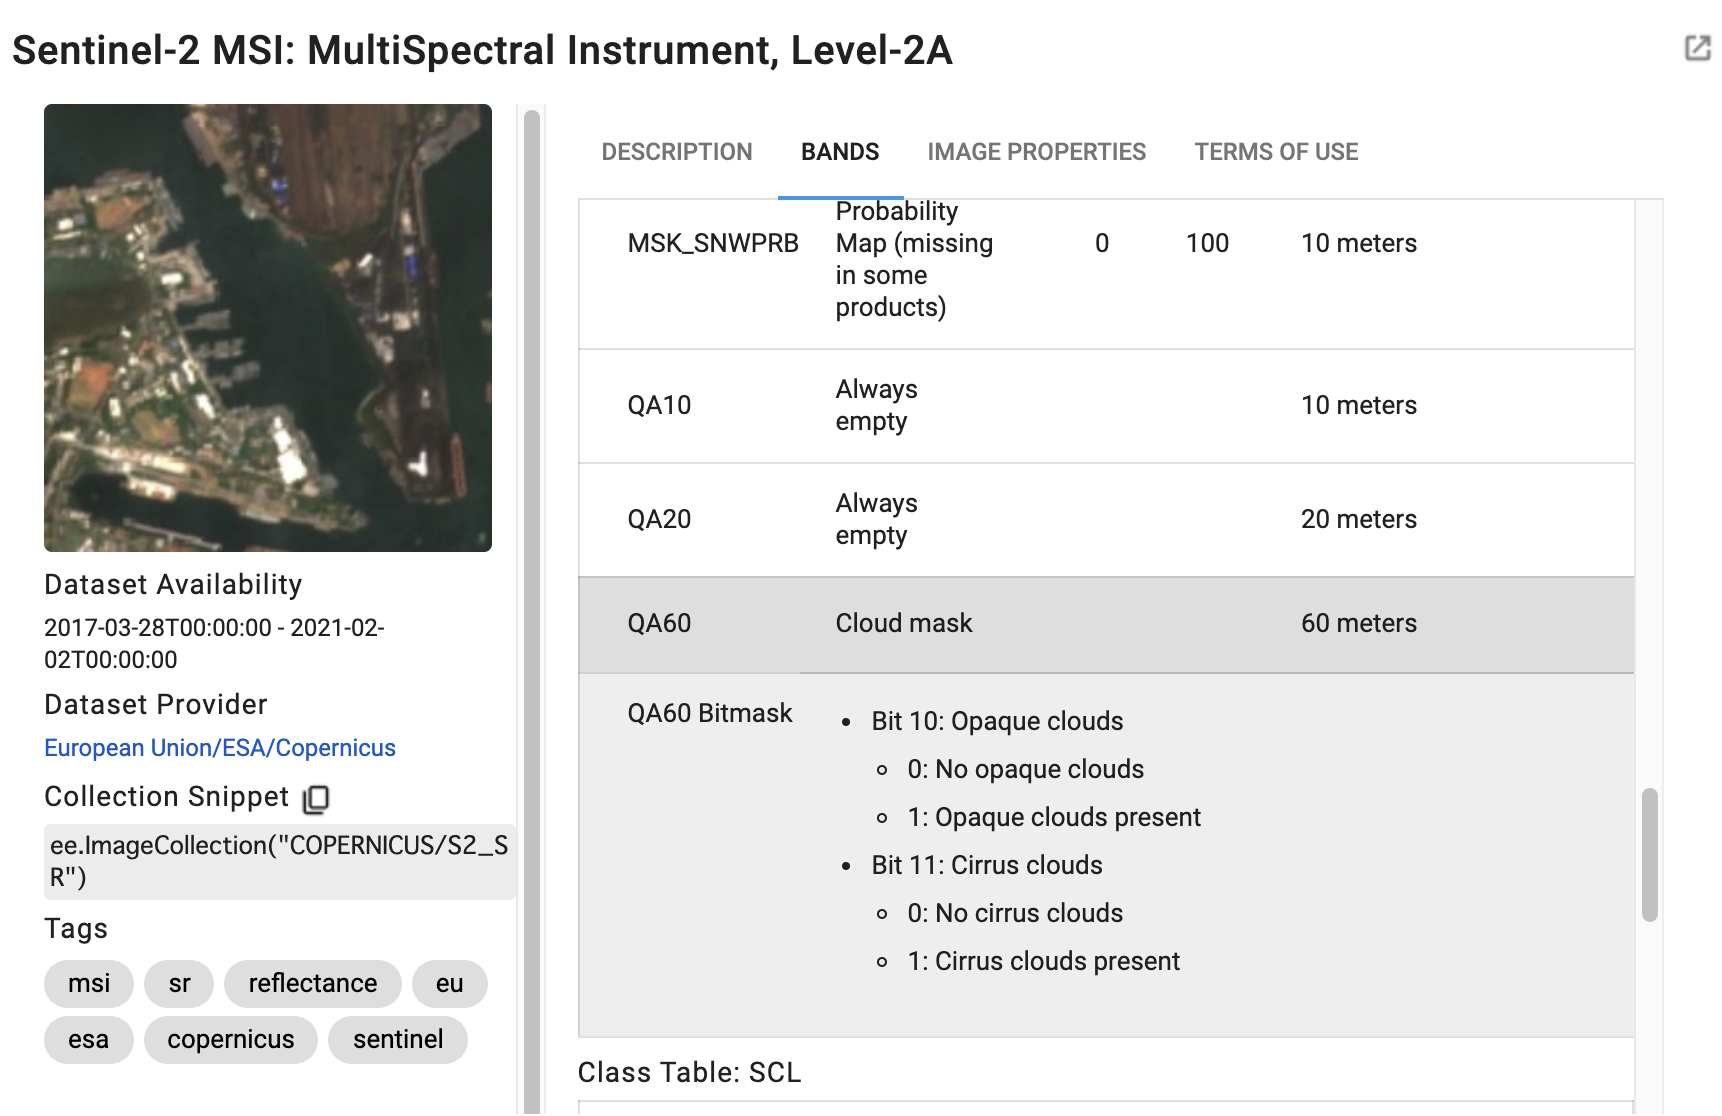

In [141]:
Map.draw_features
Map

Map(bottom=104777.0, center=[34.2742404841218, -228.06999206542972], controls=(WidgetControl(options=['positio…

In [143]:
point = ee.Geometry.Point([-122.4439, 37.7538])


L8images = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(point) \
    .filterDate('2016-01-01', '2016-12-31') \
    .sort('CLOUD_COVER') \
    .first() \
    .select('B[1-7]')

vis_params = {
    'min': 0,
    'max': 3000,
    'bands': ['B5', 'B4', 'B3']
}

Map.centerObject(point, 8)
Map.addLayer(image, vis_params, "Landsat-8")

AttributeError: 'Image' object has no attribute 'filterBounds'

In [33]:

Hinoki = ee.Feature(  
    ee.Geometry.Rectangle(131.761772, 34.299037, 131.761878, 34.298997),
    label='Hinoki1')
Bamboo = ee.Feature(  
    ee.Geometry.Rectangle(131.788620, 34.274838, 131.788923, 34.274768),
    label='Bamboo1')
Regions = ee.FeatureCollection([Sugi, Hinoki, Bamboo]);



  

Map.addLayer(Hinoki, {color: COLOR.c2},"Hinoki1");
Map.addLayer(Bamboo, {color: COLOR.c3},"Bamboo1");
Map.setCenter(131.756020, 34.301325, 11);



Map.addLayer(Sugi, {color: COLOR.c1},"Sugi1");


TypeError: __init__() got an unexpected keyword argument 'label'

In [67]:
Map.add_layer(dem, vis_params=vis_params, name="DEM30m_SRTM", shown=True, opacity=0.5)
Map.add_layer_control()

In [76]:
Map

In [ ]:

region=ee.Geometry.Rectangle(location_Yamaguchi_rectangle)

def cloudMasking(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10  
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask).divide(10000)

def ImageExport(image,description,folder,region,scale):
    task = ee.batch.Export.image.toDrive(image=image,
                                         description=description,
                                         folder=folder,
                                         region=region,
                                         scale=scale)
    task.start()

In [ ]:

def cloudMasking(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10 #cloudShadowBitMask = ee.Number(2).pow(3).int();  
    cirrusBitMask = 1 << 11 #cloudsBitMask = ee.Number(2).pow(5).int();
    # Both flags should be set to zero, indicating clear conditions.
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask).divide(10000)

def ImageExport(image,description,folder,region,scale):
    task = ee.batch.Export.image.toDrive(image=image,description=description,folder=folder,region=region,scale=scale)
    task.start()

def FeatureExport(collection,description,folder,fileFormat):
    task = ee.batch.Export.table.toDrive(collection=collection,description=description,folder=folder,fileFormat=fileFormat)
    task.start()

for i in ["20181217T032129_20181217T033234_T48PWV","20181217T032129_20181217T033234_T48PVV"]:
    print('COPERNICUS/S2/'+i)
    forimage = cloudMasking(ee.Image('COPERNICUS/S2/'+i)).select(['B2','B3','B4','B8','B11','B12'])
    formeta = ee.Image('COPERNICUS/S2/'+i)
    features = [\
    ee.Feature(None, {'value': formeta.get('SENSING_ORBIT_DIRECTION'),'name':'SENSING_ORBIT_DIRECTION'}),\
    ee.Feature(None, {'value': formeta.get('GENERATION_TIME'),'name':'GENERATION_TIME'}),\
    ee.Feature(None, {'value': formeta.get('quality_check'),'name':'quality_check'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_SOLAR_AZIMUTH_ANGLE'),'name':'MEAN_SOLAR_AZIMUTH_ANGLE'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_SOLAR_ZENITH_ANGLE'),'name':'MEAN_SOLAR_ZENITH_ANGLE'}),\
    ee.Feature(None, {'value': formeta.get('SOLAR_IRRADIANCE_B2'),'name':'SOLAR_IRRADIANCE_B2'}),\
    ee.Feature(None, {'value': formeta.get('SOLAR_IRRADIANCE_B3'),'name':'SOLAR_IRRADIANCE_B3'}),\
    ee.Feature(None, {'value': formeta.get('SOLAR_IRRADIANCE_B4'),'name':'SOLAR_IRRADIANCE_B4'}),\
    ee.Feature(None, {'value': formeta.get('SOLAR_IRRADIANCE_B8'),'name':'SOLAR_IRRADIANCE_B8'}),\
    ee.Feature(None, {'value': formeta.get('SOLAR_IRRADIANCE_B11'),'name':'SOLAR_IRRADIANCE_B11'}),\
    ee.Feature(None, {'value': formeta.get('SOLAR_IRRADIANCE_B12'),'name':'SOLAR_IRRADIANCE_B12'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_AZIMUTH_ANGLE_B2'),'name':'MEAN_INCIDENCE_AZIMUTH_ANGLE_B2'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_AZIMUTH_ANGLE_B3'),'name':'MEAN_INCIDENCE_AZIMUTH_ANGLE_B3'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_AZIMUTH_ANGLE_B4'),'name':'MEAN_INCIDENCE_AZIMUTH_ANGLE_B4'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_AZIMUTH_ANGLE_B8'),'name':'MEAN_INCIDENCE_AZIMUTH_ANGLE_B8'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_AZIMUTH_ANGLE_B11'),'name':'MEAN_INCIDENCE_AZIMUTH_ANGLE_B11'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_AZIMUTH_ANGLE_B12'),'name':'MEAN_INCIDENCE_AZIMUTH_ANGLE_B12'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_ZENITH_ANGLE_B2'),'name':'MEAN_INCIDENCE_ZENITH_ANGLE_B2'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_ZENITH_ANGLE_B3'),'name':'MEAN_INCIDENCE_ZENITH_ANGLE_B3'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_ZENITH_ANGLE_B4'),'name':'MEAN_INCIDENCE_ZENITH_ANGLE_B4'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_ZENITH_ANGLE_B8'),'name':'MEAN_INCIDENCE_ZENITH_ANGLE_B8'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_ZENITH_ANGLE_B11'),'name':'MEAN_INCIDENCE_ZENITH_ANGLE_B11'}),\
    ee.Feature(None, {'value': formeta.get('MEAN_INCIDENCE_ZENITH_ANGLE_B12'),'name':'MEAN_INCIDENCE_ZENITH_ANGLE_B12'})\
    ]
    metadata = ee.FeatureCollection(features);
    ImageExport(forimage.reproject(crs='EPSG:4326',scale=10),i,'Cambodia',region['coordinates'][0],10)
    FeatureExport(metadata,i,'Cambodia','CSV')

COPERNICUS/S2/20181217T032129_20181217T033234_T48PWV
COPERNICUS/S2/20181217T032129_20181217T033234_T48PVV


In [ ]:
Sentinel2 = ee.ImageCollection('COPERNICUS/S2').filterBounds(region).filterDate(('2015-01-01'),('2015-12-31')).map(cloudMasking).select(['B2','B3','B4','B8','B12'])
imageList = Sentinel2.toList(300) 

AreaFolderName = "Yamaguchi4326"

for i in range(imageList.size().getInfo()):
    image = ee.Image(imageList.get(i))
    ImageExport(image.reproject(crs='EPSG:4326',scale=10),
                image.get('system:index').getInfo(),
                AreaFolderName,
                region['coordinates'][0],10)

In [ ]:

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=location_Yamaguchi)

# Add the elevation model to the map object.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Display the map.
display(my_map)

## Chart visualization

Some Earth Engine functions produce tabular data that can be plotted by
data visualization packages such as `matplotlib`. The following example
demonstrates the display of tabular data from Earth Engine as a scatter
plot. See [Charting in Colaboratory](https://colab.sandbox.google.com/notebooks/charts.ipynb)
for more information.

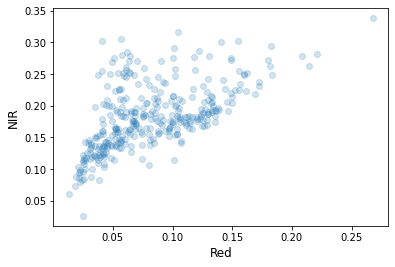

In [ ]:


# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Select Red and NIR bands, scale them, and sample 500 points.
samp_fc = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()